#### I: Introduction
Dans ce projet, nous allons travailler sur l'ensemble de données « Inclusion financière en Afrique » qui a été fourni dans le cadre de l'Inclusion financière en Afrique hébergée par la plateforme Zindi

### II: Description de l'ensamble de données
L'ensemble de données contient des informations démographiques et les services financiers utilisés par environ 33 600 personnes en Afrique de l'Est. 
Le terme inclusion financière signifie que les particuliers et les entreprises ont accès à des produits et services financiers utiles et abordables qui répondent à leurs besoins – transactions, paiements, épargne, crédit et assurance – fournis de manière responsable et durable.

**Objectif:** Est de construire un modèle de  ML pour prédire les  personnes qui sont les plus susceptibles d'avoir ou d'utiliser un compte bancaire

#### III: Plan de travail
#### 1: Importation des packages
#### 2: Chargement de la base de données
#### 3: Analyse Exploratoire des données
- Afficher les informations générale sur l'ensemble de données
- Créez des rapports de profilage de pandas pour obtenir des informations sur l'ensemble de données
- Gérer les valeurs manquantes et corrompues
- Supprimer les doublons, s'ils existent
- Gérer les valeurs aberrantes, si elles existent
#### 3.Encoder les caractéristiques catégorielles

#### 4.Sur la base de l'exploration des données précédentes, former et tester un classificateur d'apprentissage automatique

#### 5.Créez une application simplifiée (en local) et ajoutez des champs de saisie pour vos fonctionnalités et un bouton de validation à la fin du formulaire

#### 6.Importez votre modèle ML dans l'application Streamlit et commencez à faire des prédictions en fonction des valeurs de fonctionnalités fournies

#### 7.Déployez votre application sur le partage Streamlit :

- Créer un compte de partage GitHub et Streamlit
- Créer un nouveau dépôt git
- Téléchargez votre code local dans le dépôt git nouvellement créé
- connectez-vous à votre compte Streamlit et déployez votre application à partir du dépôt Git
rtir du dépôt Git
 

# 1: Importation des librairies necessaires

In [2]:
#importation des packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.utils import resample
import warnings #IGNORER LES ALERTES
warnings.filterwarnings("ignore")

import joblib

# 2: Chargement de la base de données

In [3]:
# importation des données
path="E:/exerces G-6/AED/exos_ML_deployements/inclusion_financier_bank/datasets_db/"
file=path+"Financial_inclusion_dataset.csv"
data=pd.read_csv(file)

# 3: Annalyse Exploratoire des données

In [4]:
# affichage des premieres lignes
data.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# information générale du jeux de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Notre base de données contient **23524** observations et **13** fonctionnalitées dont **3** de type **Numérique** et 10 de type **Categorique**

In [6]:
# Statistique récapitulatives
#---------variable numeriques-----------
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


Il semble que nos donnéés numériques suivit une loi normale , mais il un grand ecart entre elles

In [7]:
#---------variable categoriques-----------
data.describe(include="O")

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [8]:
# selection des variables selon le type
cols_cat=data.drop('uniqueid',axis=1).select_dtypes(exclude="number").columns.tolist()
cols_num=data.select_dtypes(include="number").columns.tolist()

<Figure size 1500x500 with 0 Axes>

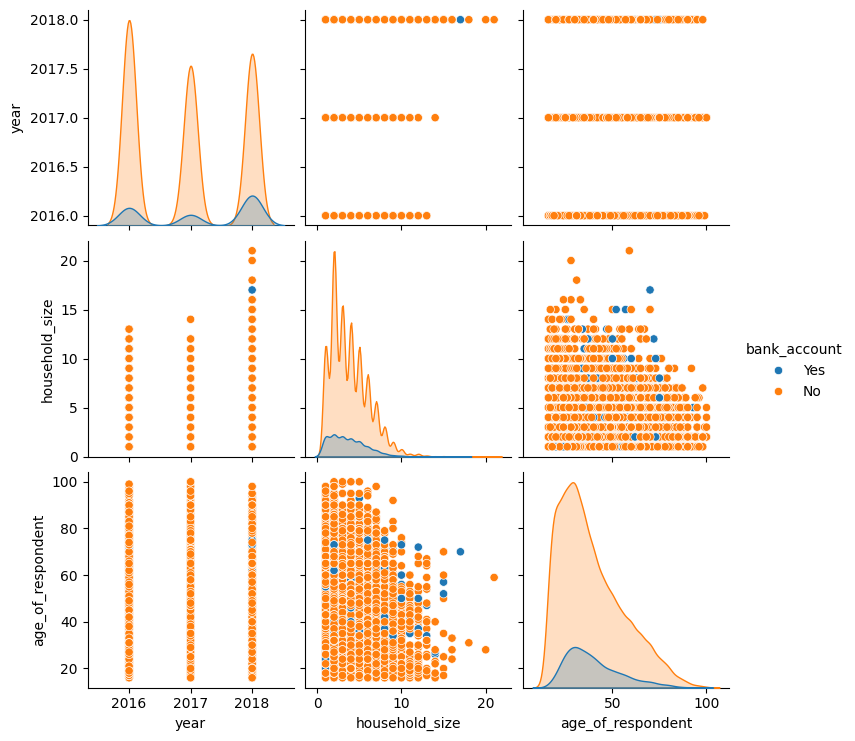

In [9]:
# verication de la distribution des variables

plt.figure(figsize=(15,5))
sns.pairplot(data,hue="bank_account")

<Figure size 1400x500 with 0 Axes>

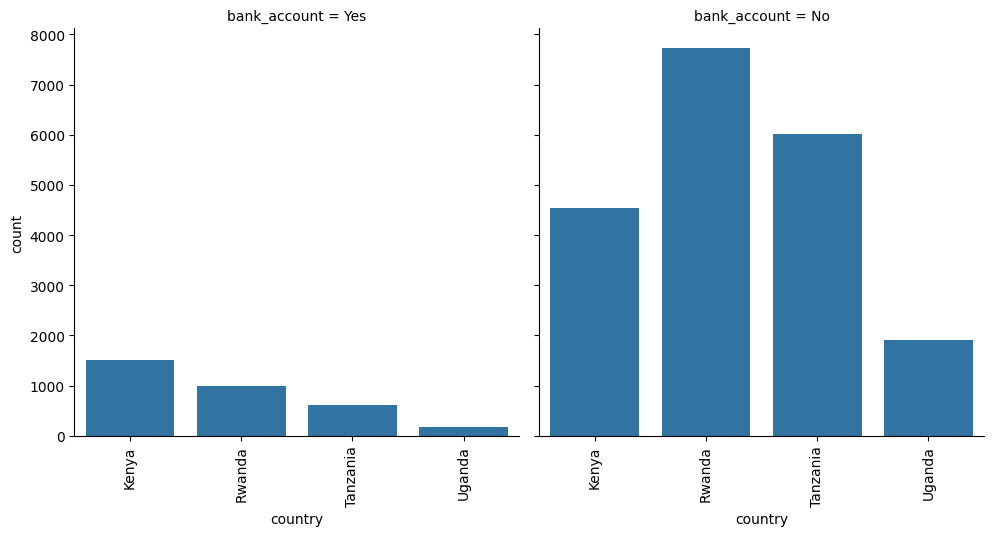

<Figure size 1400x500 with 0 Axes>

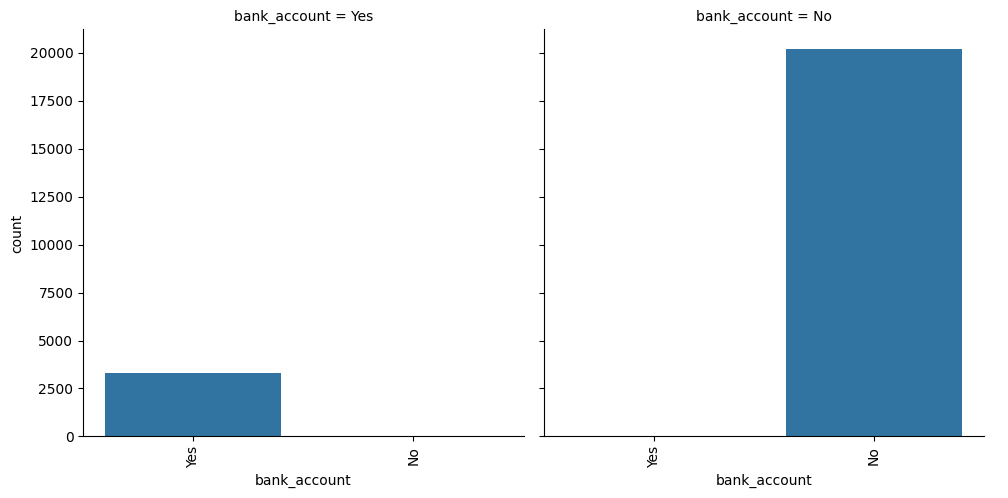

<Figure size 1400x500 with 0 Axes>

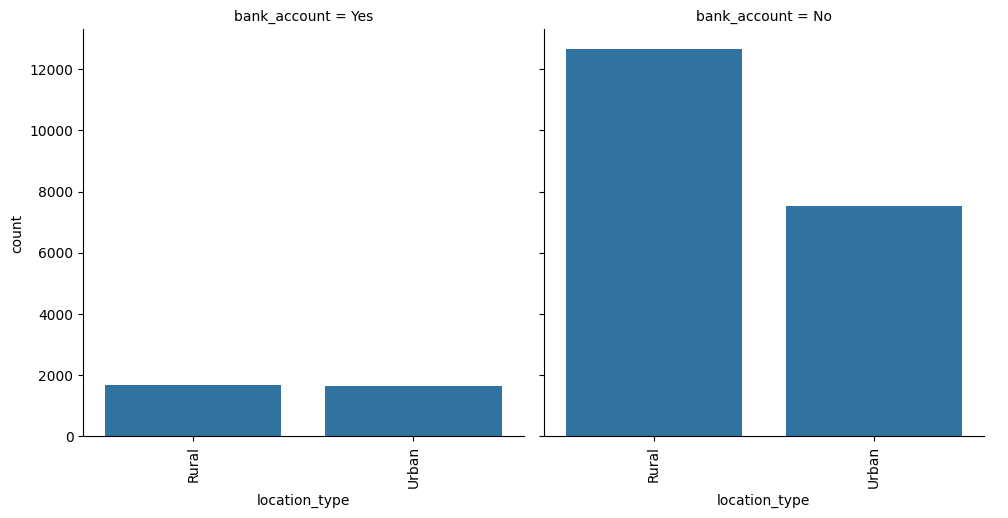

<Figure size 1400x500 with 0 Axes>

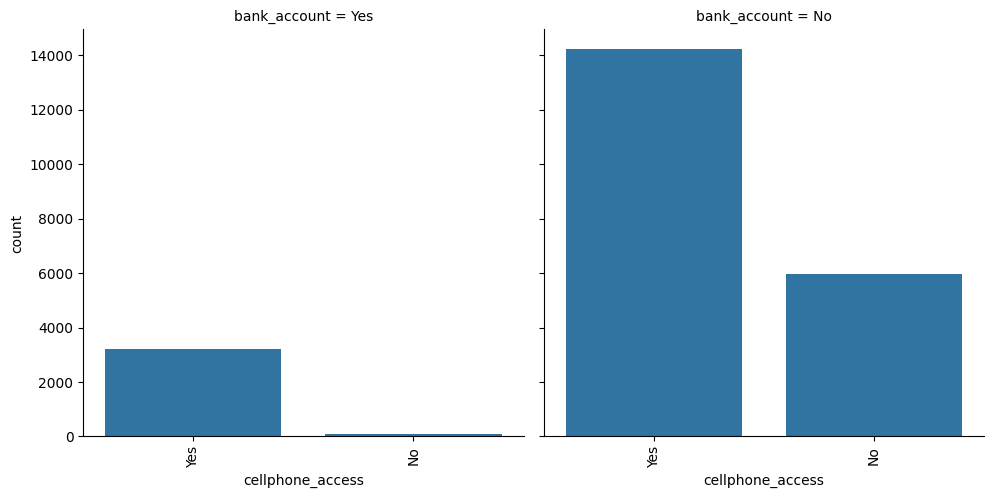

<Figure size 1400x500 with 0 Axes>

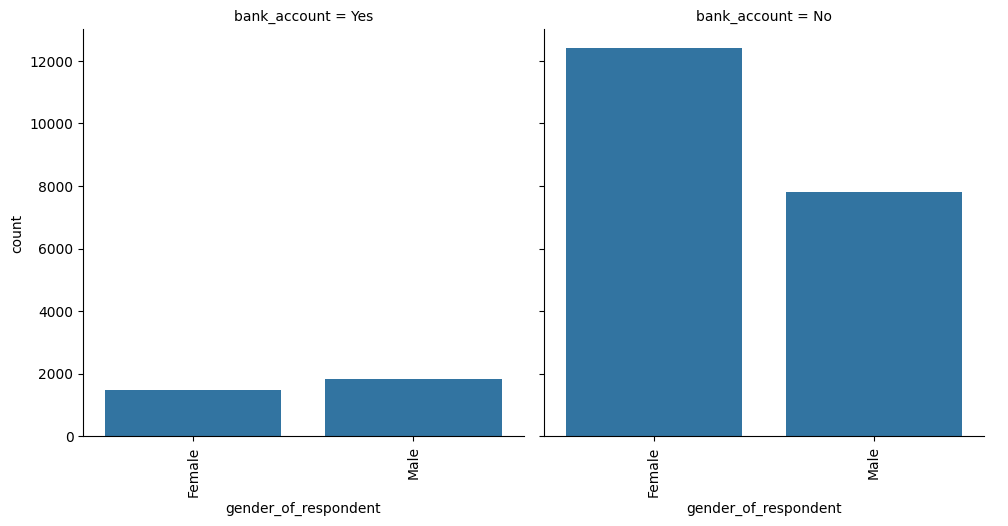

<Figure size 1400x500 with 0 Axes>

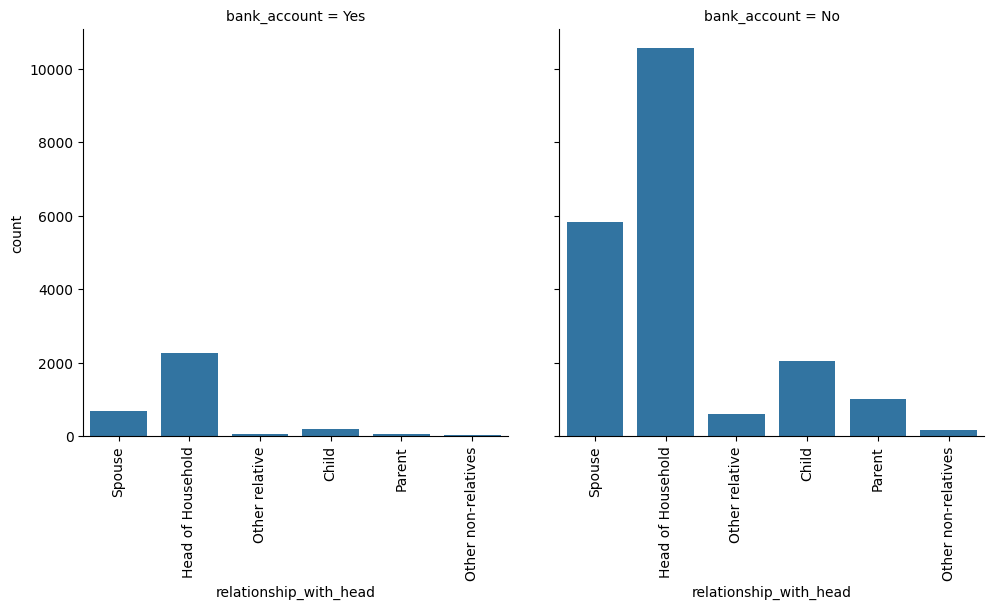

<Figure size 1400x500 with 0 Axes>

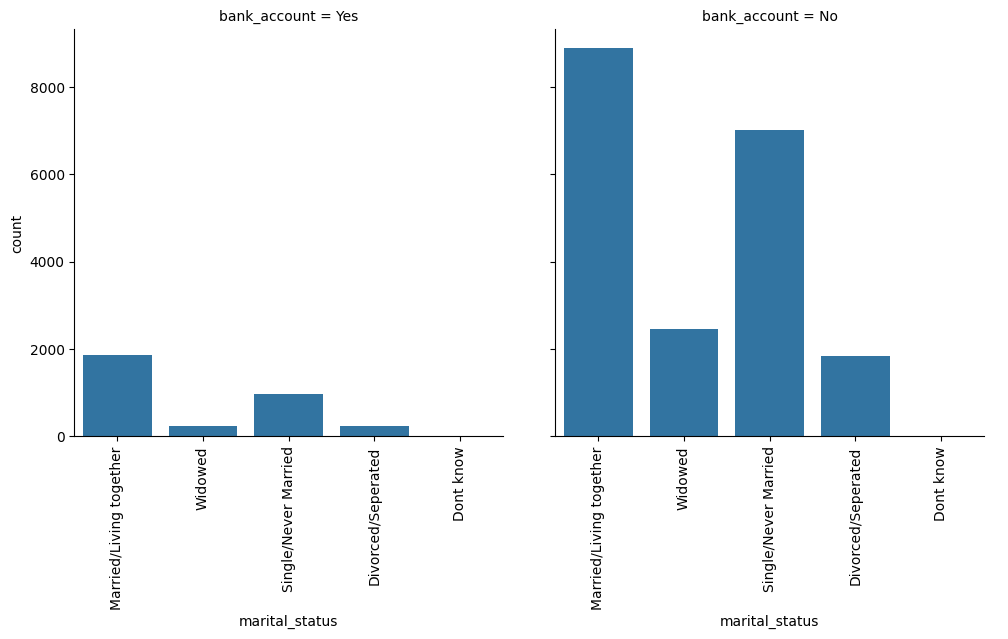

<Figure size 1400x500 with 0 Axes>

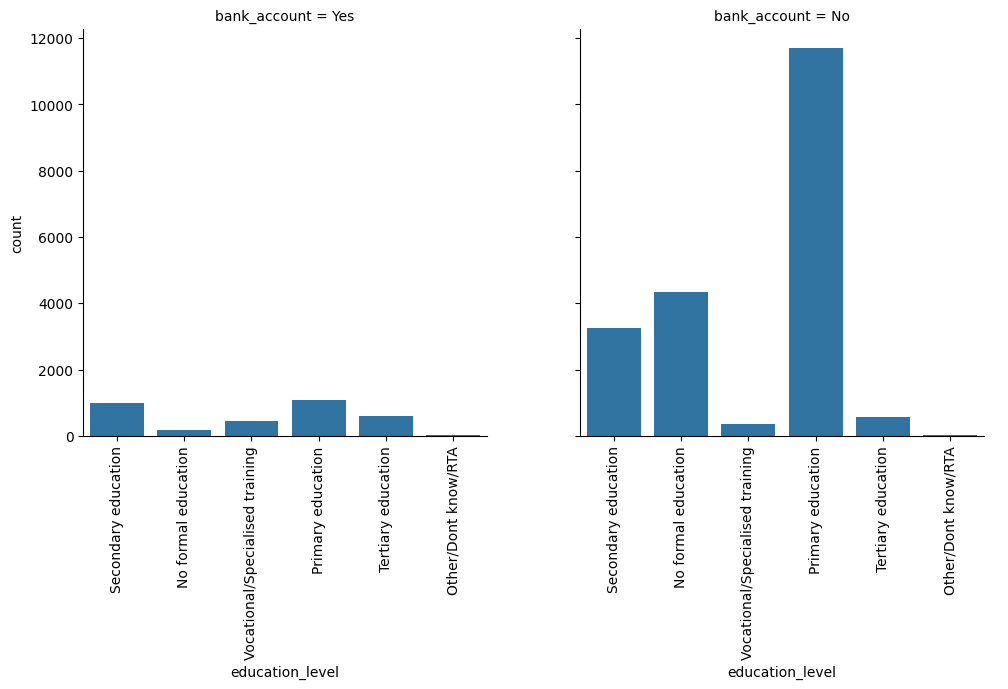

<Figure size 1400x500 with 0 Axes>

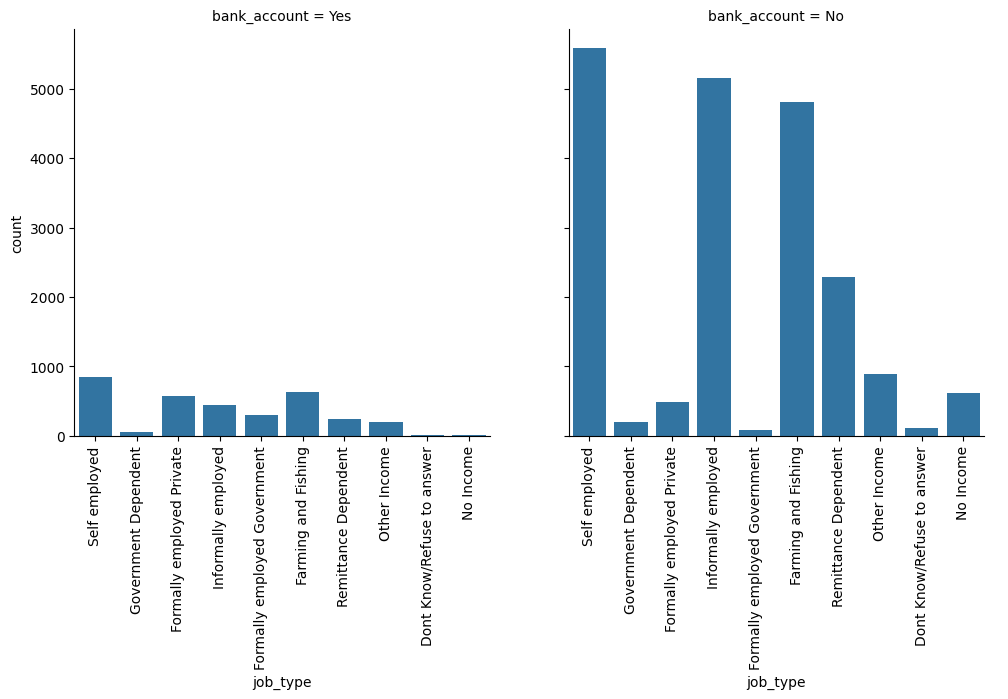

In [10]:
# visualisation de la distribution des données categorielles
def catplot_col(name_data,list_cols):
    for col in list_cols:
        plt.figure(figsize=(14,5))
        fig = sns.catplot(x=col,col="bank_account",data=name_data, kind="count")
       
        fig.tick_params(axis='x', rotation=90)
        plt.show()

catplot_col(data,cols_cat)
#--------categorielle---------------------


### Gestion des valeurs manquantes

In [11]:
# Verification des valeurs manquantes
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Pas de valeurs manquantes

### Gestion des doublons

In [12]:
# verification des doublons
data.duplicated().value_counts()

False    23524
Name: count, dtype: int64

Pas de doublons
### Gestion des valeurs aberrantes

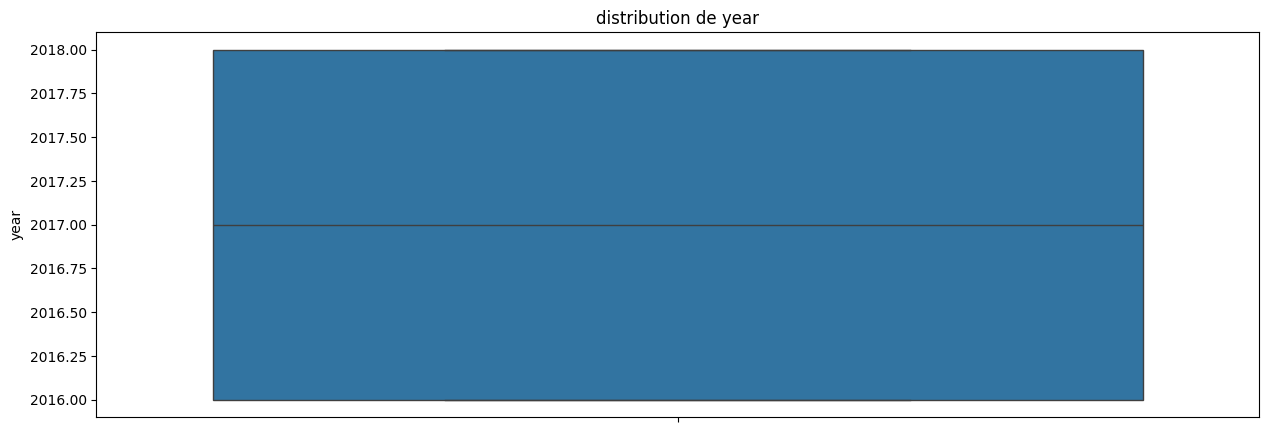

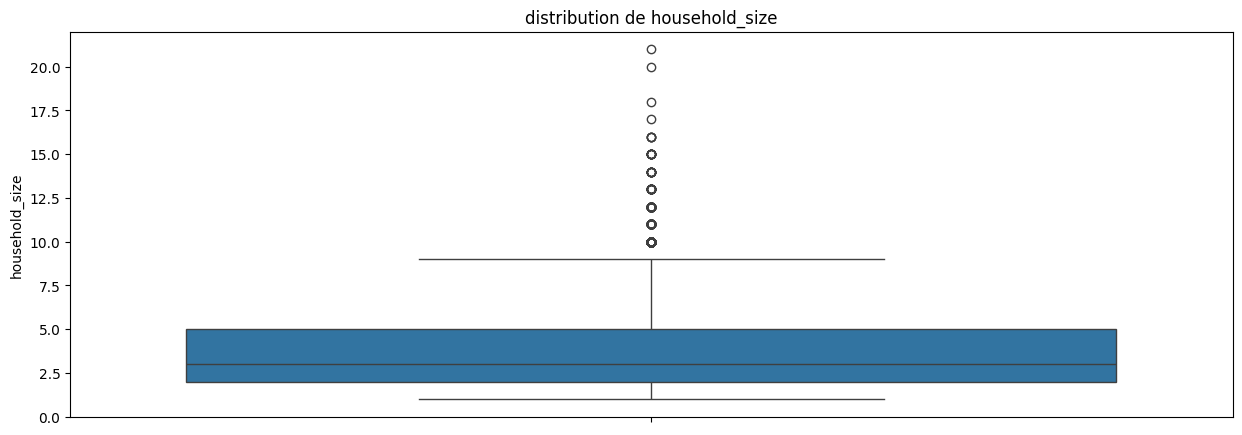

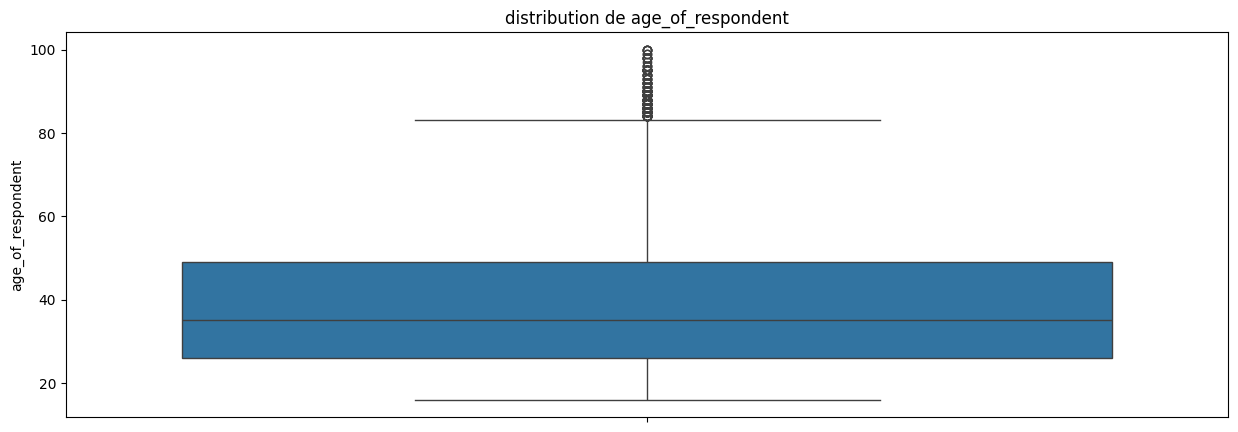

In [13]:
# verification
for col in cols_num:
    plt.figure(figsize=(15,5))
    sns.boxplot(y=col, data=data).set_title('distribution de '+str(col))
    plt.show()

In [19]:
# Fonction de detection des outliers par la methode des IQR
from scipy import stats
'''
formule :
q1: 1er quantile(0.25),
q3: 3eme quantile(0.75), 
iqr=q3 - q1
les bornes
lower=q1-1.5*iqr,
upper=q3 + 1.5*iqr

les valeurs aberrantes:
si valeur < lower ou valeurs > upper
'''
#----borne inferieur lowers
def lowers(data,var_name):
    return data[var_name].quantile(0.25) - 1.5*stats.iqr(data[var_name])

#----borne superieur uppers
def uppers(data,var_name):
    return data[var_name].quantile(0.75) + 1.5*stats.iqr(data[var_name])
# outliers
def finding_outliers(data,var_name):
    outliers=data[(data[var_name]< lowers(data,var_name)) | (data[var_name] > uppers(data,var_name)) ]
    return outliers

# fonction de correction de valeurs aberrantes
def resolving_outliers(data,vars,strategie):
    for var in vars:
        '''
        imputation par la methode iqr:
        remplace les valeurs < a la borne par la borne inferieur et les valeurs > à la  borne superieur par la borne superieure

        imputation par la mediane:
        remplace toutes les valeur aberrantes par la médiane
        '''
        if strategie=="upper":
            data.loc[(finding_outliers(data,var).index,var)]=data.loc[(finding_outliers(data,var).index,var)].apply(
                lambda x : lowers(data,var) if x < lowers(data,var) else uppers(data,var))
            
        elif strategie=="mediane":
            data.loc[(finding_outliers(data,var).index,var)]=data[var].median()
        else:
            print("veillez selection une strategie d'imputation")

In [71]:
# recherche des outliers
def finding_outliers(data,var_name):
#---borne inferieurs lowers
      lowers=data[var_name].quantile(0.25) - 1.5*stats.iqr(data[var_name])
#----borne superieur uppers
      uppers=data[var_name].quantile(0.75) + 1.5*stats.iqr(data[var_name])
      #---selection des valeurs aberrantes
      outliers=data[(data[var_name]< lowers(data,var_name)) | (data[var_name] > uppers(data,var_name)) ]
      return outliers
def outliers_pourcent(data,cols_num):   
   #------creation du tableau recapitulatif des outlires
   total_outlier=[]
   pourcentage=[]
   data_outliers={}
   effect=data.shape[0]

   for col in cols_num:
      nombre=len(finding_outliers(data,col)[col])
      total_outlier.append(nombre)
      pourcentage.append(round((nombre/effect)*100,2))

   data_outliers["Variables"]=cols_num
   data_outliers["Nombre"]=total_outlier
   data_outliers["Pourcentage"]=pourcentage

   tab_outliers=pd.DataFrame(data_outliers)
   return tab_outliers

In [72]:
outliers_pourcent(data,cols_num)

TypeError: 'numpy.float64' object is not callable

 Il n'y a pas assez de valeurs aberrante donc nous allons les conserver

# 4: Encoder les caractéristiques catégorielles

In [ ]:
# verification du nombre de valeurs unique de chaque variables
new_data=data
new_data[cols_cat].nunique()

country                    4
bank_account               2
location_type              2
cellphone_access           2
gender_of_respondent       2
relationship_with_head     6
marital_status             5
education_level            6
job_type                  10
dtype: int64

In [ ]:
# selection des variables binaire
col_binary = new_data[cols_cat].nunique()[new_data[cols_cat].nunique()<3].index.tolist()
col_binary

['bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent']

In [ ]:
# selection des variables non binaire
col_not_binary = new_data[cols_cat].nunique()[new_data[cols_cat].nunique()>2].index.tolist()
col_not_binary

['country',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [ ]:
# appliquons un encodage à chaud aux variables binaire
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in col_binary:
    new_data[col]= le.fit_transform(new_data[col])
    
# verification
new_data.head(3)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [ ]:
# appliquans une get_dummies aux variables non binaire
data_not_binary=pd.get_dummies(new_data[col_not_binary], columns=col_not_binary).astype(int)
data_not_binary.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# creation une nouvelle dataframe avec les données traitées
df_clear=pd.concat([new_data[cols_num], new_data[col_binary],data_not_binary], axis=1)
df_clear.head(3)

,year,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,2018,3,24,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,5,70,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,5,26,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# traitement des noms des colonnes: # remplacons les espace et les slash par _
all_cols=[]
cols=df_clear.columns.tolist()

for i in range(0,len(cols)):
    var = cols[i].replace(" ","_").replace("/","_")
    all_cols.append(var)

# creation d'une dataframe apartir des nouvelles colonnes
df=pd.DataFrame(df_clear.values, columns=all_cols)
df.head()

,year,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,...,job_type_Dont_Know_Refuse_to_answer,job_type_Farming_and_Fishing,job_type_Formally_employed_Government,job_type_Formally_employed_Private,job_type_Government_Dependent,job_type_Informally_employed,job_type_No_Income,job_type_Other_Income,job_type_Remittance_Dependent,job_type_Self_employed
0,2018,3,24,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,5,70,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2018,5,26,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2018,5,34,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2018,8,26,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# 6: Division des données en train et test

In [ ]:
# division des données
x = df.drop('bank_account',axis=1)
y = df['bank_account']
seed=95
# 60% en train et 40% en test
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.4, stratify=y, random_state=seed)

# dans les données de test: 50% en Validation et 50% en test

x_val,x_test,y_val,y_test = train_test_split(x_test,y_test, test_size=0.5, stratify=y_test, random_state=seed)

### 7: Gestion de l'equilibre des classes

## 1: Verification

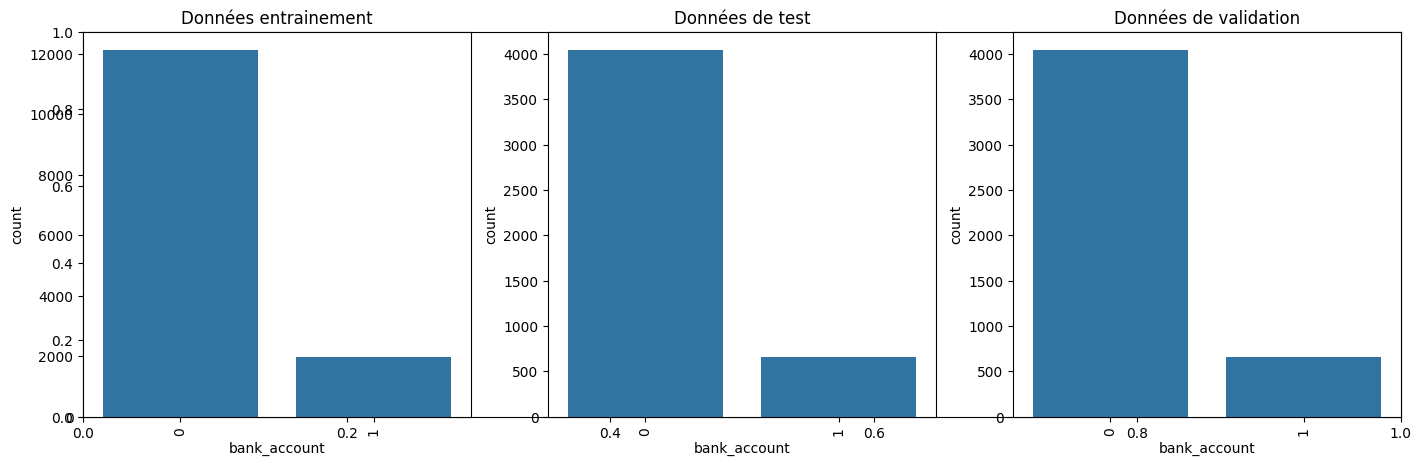

In [ ]:
# verification du deséquilibre
plt.subplots(figsize=(17,5))
plt.subplot(131)
sns.countplot(x=y_train).set_title('Données entrainement')
plt.xticks(rotation=90)

plt.subplot(132)
sns.countplot(x=y_test).set_title('Données de test')
plt.xticks(rotation=90)

plt.subplot(133)
sns.countplot(x=y_val).set_title('Données de validation')
plt.xticks(rotation=90)
plt.show()


## 2: Correction

In [ ]:
pd.DataFrame(y_train).value_counts(normalize=True)

bank_account
0               0.859218
1               0.140782
Name: proportion, dtype: float64

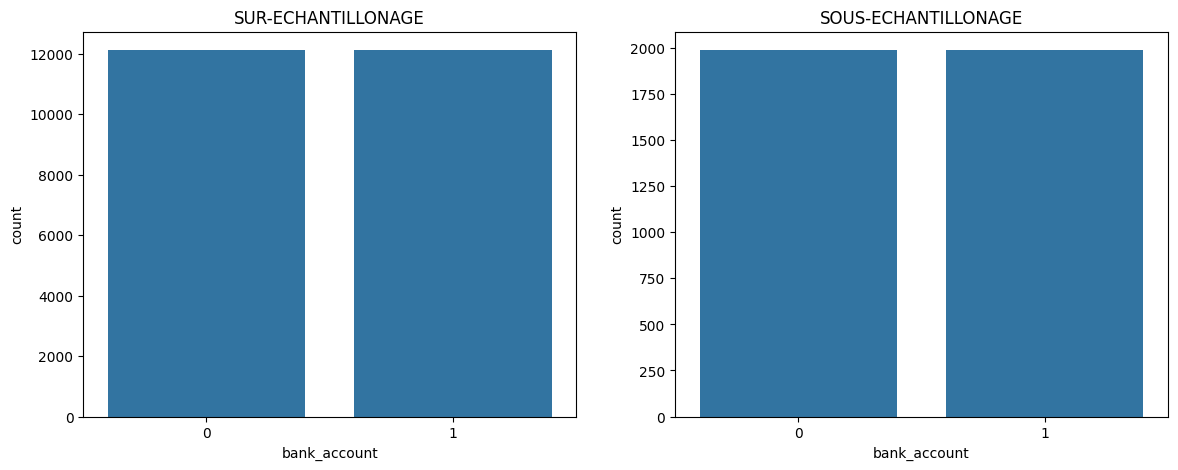

In [ ]:

# correction du désequilibre des classes sur le données d'entrainement
x1=x_train
x1['bank_account']=y_train.values
minority = x1[x1['bank_account']==1]
majority = x1[x1['bank_account']==0]

#---------sous-echantillonage------------------
majoriy_dowsample = resample(majority, n_samples=len(minority),random_state=95)
dowsampled = pd.concat([minority,majoriy_dowsample])
x_train_dow=dowsampled.drop('bank_account',axis=1)
y_train_dow=dowsampled['bank_account']

# correction du désequilibre des classes
#---------sur echantillonage------------------
minority_upsample = resample(minority, n_samples=len(majority),random_state=95)
upsampled = pd.concat([majority,minority_upsample])
x_train_up=upsampled.drop('bank_account',axis=1)
y_train_up=upsampled['bank_account']

# verification apres correction
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.countplot(x=y_train_up).set_title('SUR-ECHANTILLONAGE')

plt.subplot(122)
sns.countplot(x=y_train_dow).set_title('SOUS-ECHANTILLONAGE')
plt.show()


In [ ]:
pd.DataFrame(y_train_up).value_counts(normalize=True)

CHURN
0        0.5
1        0.5
Name: proportion, dtype: float64

In [ ]:
# choix des données d'entrainement
features_train = x_train_up
labels_train = y_train_up


#### 3: Normalisation
L normalisation consiste à une mise à l'échel des données, pour le faire on utlise deux (2) methodes:
- La Normalisation MinMax: qui consiste à ramener la valeur de toutes les données dans un intervalle de 0 à 1 
- La Normalisation z-score : qui consiste à mettre à mettre la moyenne à 1 et le l'ecart type à 0 de toutes les données.


In [ ]:
# normalisation avec MinMaxScaler
scaler = MinMaxScaler()
features_train = pd.DataFrame(scaler.fit_transform(features_train),columns=features_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=features_train.columns)
x_val = pd.DataFrame(scaler.fit_transform(x_val),columns=features_train.columns)

In [ ]:
# verification 
features_train.head()

,year,household_size,age_of_respondent,location_type,cellphone_access,gender_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,...,job_type_Dont_Know_Refuse_to_answer,job_type_Farming_and_Fishing,job_type_Formally_employed_Government,job_type_Formally_employed_Private,job_type_Government_Dependent,job_type_Informally_employed,job_type_No_Income,job_type_Other_Income,job_type_Remittance_Dependent,job_type_Self_employed
0,0.0,0.10,0.154762,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.10,0.047619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.00,0.416667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.35,0.250000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.5,0.00,0.083333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4: Selection des meilleurs variales de prediction

In [ ]:
## RandomForestClassifier
rf = RandomForestClassifier(random_state=95)
model_rf = rf.fit(features_train,labels_train)

Text(0.5, 0, 'Importance')

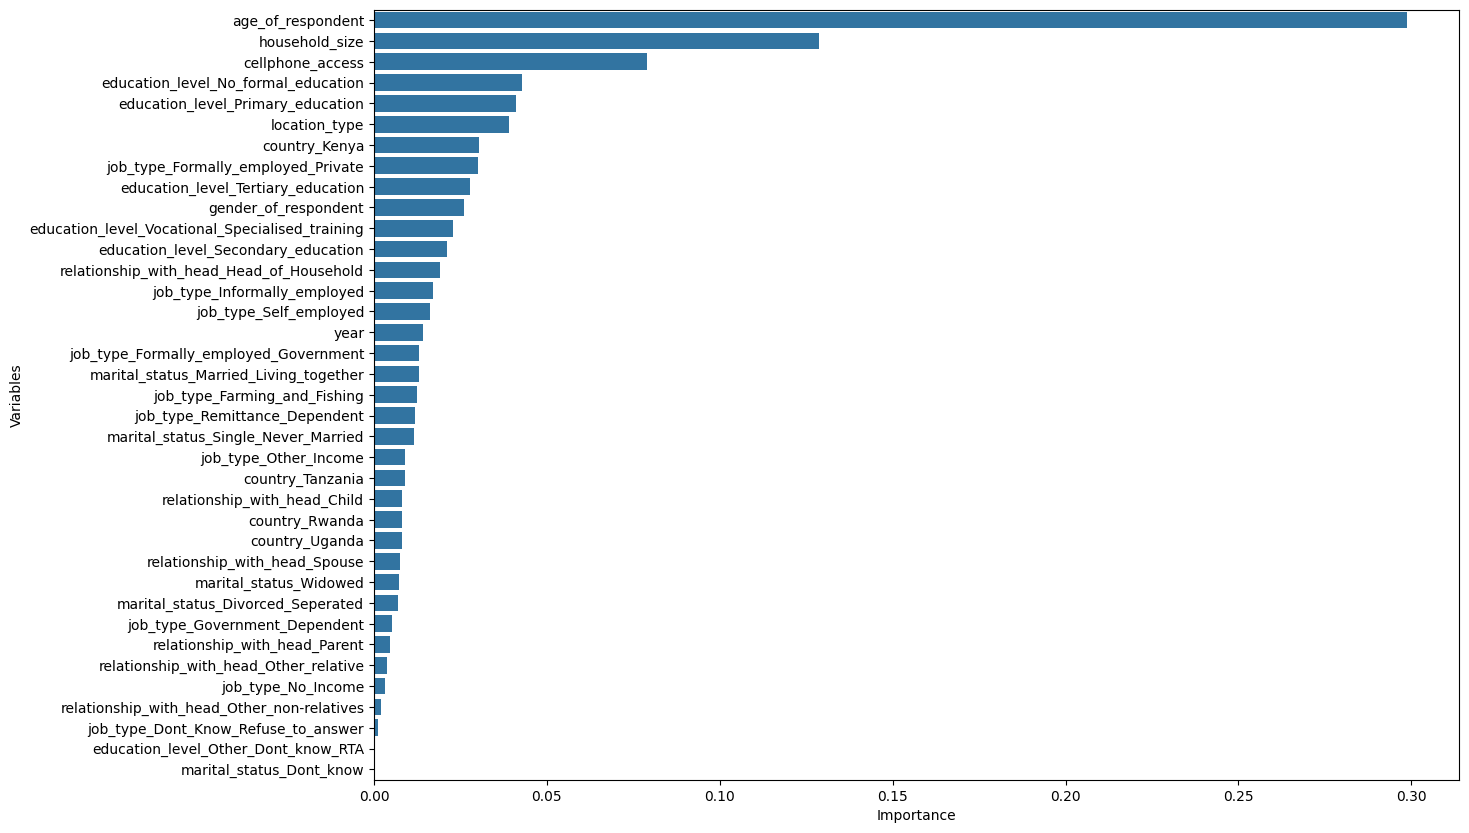

In [ ]:
# selection des variables les plus importantes
imp_vars= pd.Series(model_rf.feature_importances_, index=x_train_up.columns).sort_values(ascending=False)
plt.figure(figsize=(14,10))
sns.barplot(x=imp_vars.values,y=imp_vars.index)
plt.ylabel('Variables')
plt.xlabel('Importance')



In [ ]:
imp_vars

age_of_respondent                                  0.298857
household_size                                     0.128667
cellphone_access                                   0.078951
education_level_No_formal_education                0.042882
education_level_Primary_education                  0.040994
location_type                                      0.038961
country_Kenya                                      0.030307
job_type_Formally_employed_Private                 0.030038
education_level_Tertiary_education                 0.027702
gender_of_respondent                               0.026029
education_level_Vocational_Specialised_training    0.022747
education_level_Secondary_education                0.021159
relationship_with_head_Head_of_Household           0.018972
job_type_Informally_employed                       0.016948
job_type_Self_employed                             0.016200
year                                               0.014303
job_type_Formally_employed_Government   

In [ ]:
# selection des variables
seuil=0.02
vars_selected=imp_vars[imp_vars>seuil].index.tolist()

features_train=features_train[vars_selected]
x_test=x_test[vars_selected]
x_val=x_val[vars_selected]

vars_selected

['age_of_respondent',
 'household_size',
 'cellphone_access',
 'education_level_No_formal_education',
 'education_level_Primary_education',
 'location_type',
 'country_Kenya',
 'job_type_Formally_employed_Private',
 'education_level_Tertiary_education',
 'gender_of_respondent',
 'education_level_Vocational_Specialised_training',
 'education_level_Secondary_education']

# 7: Modelisation
L'objectif: Notre but est de construire un modele de classification qui prédit les personnes les plus suceptibles de poceder un compte bancaire
Pour cela, nous utiliserons plusieurs algorithmes :
- Logistic Regression
- RondomForest,
- Classificateur Perceptron Multicouche
- KNN
- Arbre de décison
Afin  de comparerer leurs performances et choisir le meilleur modele

In [ ]:
### Commme nous allons utiliser plusieurs algorithmes, alors nous allons créer une fonction d'evaluation de modele
def evaluation_model(model):
    # prediction
    ytrain_pred = model.predict(features_train)

    ytest_pred = model.predict(x_test)
    
    #EVALUATION DE PERFORMANCE

    print("Performance sur les données d'entrainement\n")
    print(classification_report(y_train_up,ytrain_pred))
    # print("Accuracy : ",round(accuracy_score(y_train_up,ytrain_pred),2))
    # print("Recall : ",round(recall_score(y_train_up,ytrain_pred),2))
    # print("Precision : ",round(precision_score(y_train_up,ytrain_pred),2))

    print("*"*50)

    print("Performance sur les données de test\n")
    print(classification_report(y_test,ytest_pred))
    # print("Accuracy : ",round(accuracy_score(y_test,ytest_pred),2))
    # print("Recall : ",round(recall_score(y_test,ytest_pred),2))
    # print("Precision : ",round(precision_score(y_test,ytest_pred),2))

    # matrice de confusion
    cm=confusion_matrix(y_test,ytest_pred)
    cm_disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_disp.plot()
    plt.show()

## A: L'algorithme de regression logistique

In [ ]:
# intiation du modele
# dictionnaire des hyperparametres
hyperparams={"C": [0.001,0.01,10,50,100,500]}

# recherche des hyperparametres
lr_grid_class = GridSearchCV(estimator = LogisticRegression(random_state=seed,max_iter=500), 
                             param_grid =hyperparams, scoring='f1',cv=5)
# entrainement du modele
model_lr_grid = lr_grid_class.fit(features_train,labels_train)

# Meilleure score ete meilleure hypothese
print(round(model_lr_grid.best_score_,3))

print(model_lr_grid.best_estimator_)

0.746
LogisticRegression(C=10, max_iter=500, random_state=95)


Notre modele à des trés bonnes performances sur les données d'entrainement. Maintenant évaluons le sur les données de test afin de s'assurer sa capacité de généralisé sur les nouvelles données.

Performance sur les données d'entrainement

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12127
           1       0.76      0.73      0.75     12127

    accuracy                           0.75     24254
   macro avg       0.75      0.75      0.75     24254
weighted avg       0.75      0.75      0.75     24254

**************************************************
Performance sur les données de test

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      4043
           1       0.34      0.74      0.46       662

    accuracy                           0.76      4705
   macro avg       0.64      0.75      0.65      4705
weighted avg       0.86      0.76      0.79      4705



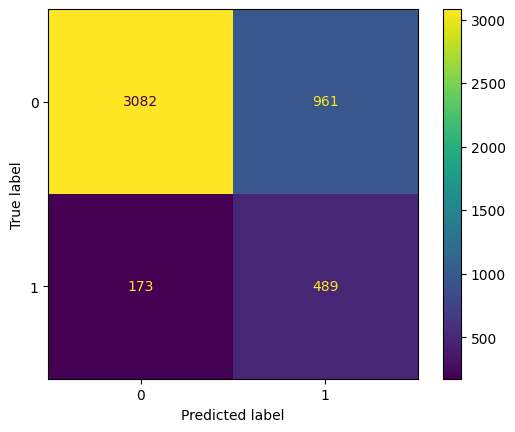

In [ ]:
# evaluation le modele sur les données de validation
evaluation_model(model_lr_grid.best_estimator_)


**Afin de voir si on peut ameliorer la performance de notre algorithme
appliquons l'algorithme:**
RECURSIVE FEATURES ELIMINATORc(RFE) afin de voir s'il garde la meme performance lorsqu'on reduit le nombre de variable
prédictrices En effet plus le modle complexe plus il est difficile à interpreter.

In [ ]:
# Creation d'une fonction de contruire d'un modele Avec utilisation de RFE
def model_with_rfe(model):
    rfe_model=RFE(estimator=model,verbose=0) # verbose=0 not print durind modele runing de n'es pas s'executer pen
    rfe_model.fit(features_train,labels_train)
    mask=rfe_model.support_
    reduced_x= features_train.loc[:,mask]
    print(reduced_x.columns)
    return rfe_model

In [ ]:
rfe_lr_model=model_with_rfe(model_lr_grid.best_estimator_)
rfe_lr_model

Index(['age_of_respondent', 'cellphone_access',
       'education_level_No_formal_education',
       'education_level_Primary_education',
       'job_type_Formally_employed_Private',
       'education_level_Vocational_Specialised_training'],
      dtype='object')


RFE(estimator=LogisticRegression(C=10, max_iter=500, random_state=95))

Performance sur les données d'entrainement

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     12127
           1       0.73      0.71      0.72     12127

    accuracy                           0.73     24254
   macro avg       0.73      0.73      0.73     24254
weighted avg       0.73      0.73      0.73     24254

**************************************************
Performance sur les données de test

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      4043
           1       0.31      0.70      0.43       662

    accuracy                           0.74      4705
   macro avg       0.63      0.72      0.63      4705
weighted avg       0.85      0.74      0.78      4705



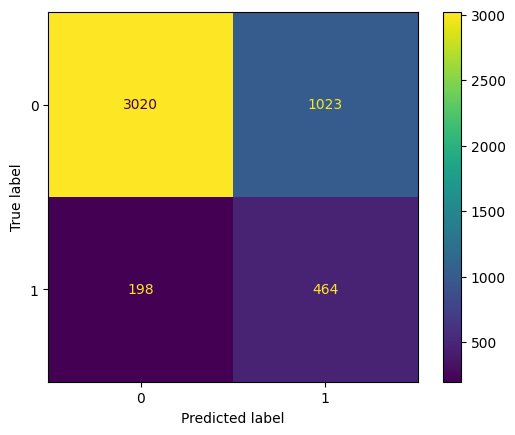

In [ ]:
# eveluation du modele avec RFE
evaluation_model(rfe_lr_model)


Le RFE à réduit le nombres variables, Mais il na pas pu ameliorer les performances du modele
donc nous allons le choisir à la place de celui obtenu sans RFE

## B: Alogorithme de foret aleatoire

In [ ]:
# intiation du modele
# dictionnaire des hyperparametres
hyperparams={'n_estimators':[10,50,100,500,1000],
               'max_depth':[3,5,10,20,None]}

# recherche des hyperparametres
rf_grid_class = GridSearchCV(estimator = RandomForestClassifier(random_state=seed), 
                             param_grid =hyperparams, scoring='f1',cv=5)
# entrainement du modele
model_rf_grid = rf_grid_class.fit(features_train,labels_train)

# Meilleure score ete meilleure hypothese
print(round(model_rf_grid.best_score_,3))

print(model_rf_grid.best_estimator_)

0.897
RandomForestClassifier(random_state=95)


In [ ]:
model_rf_grid.best_estimator_

RandomForestClassifier(random_state=95)

Performance sur les données d'entrainement

              precision    recall  f1-score   support

           0       0.97      0.91      0.93     12127
           1       0.91      0.97      0.94     12127

    accuracy                           0.94     24254
   macro avg       0.94      0.94      0.94     24254
weighted avg       0.94      0.94      0.94     24254

**************************************************
Performance sur les données de test

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      4043
           1       0.33      0.49      0.40       662

    accuracy                           0.79      4705
   macro avg       0.62      0.67      0.64      4705
weighted avg       0.83      0.79      0.81      4705



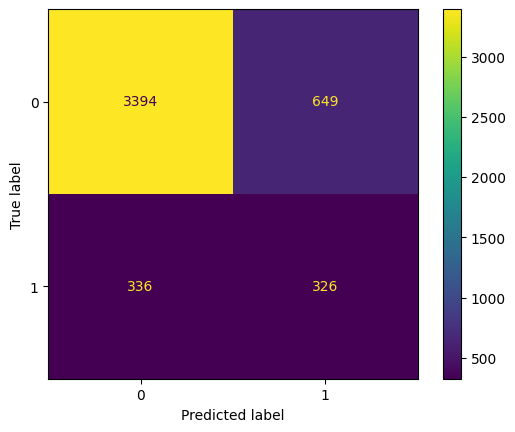

In [ ]:
# evaluation du modele
evaluation_model(model_rf_grid.best_estimator_)


In [ ]:
# appliquons le RFE sur RF
rfe_rf_model=model_with_rfe(model_rf_grid.best_estimator_)
rfe_rf_model

Index(['age_of_respondent', 'household_size', 'cellphone_access',
       'education_level_No_formal_education',
       'education_level_Primary_education', 'country_Kenya'],
      dtype='object')


RFE(estimator=RandomForestClassifier(random_state=95))

Performance sur les données d'entrainement

              precision    recall  f1-score   support

           0       0.88      0.79      0.84     12127
           1       0.81      0.90      0.85     12127

    accuracy                           0.84     24254
   macro avg       0.85      0.84      0.84     24254
weighted avg       0.85      0.84      0.84     24254

**************************************************
Performance sur les données de test

              precision    recall  f1-score   support

           0       0.92      0.77      0.83      4043
           1       0.29      0.57      0.38       662

    accuracy                           0.74      4705
   macro avg       0.60      0.67      0.61      4705
weighted avg       0.83      0.74      0.77      4705



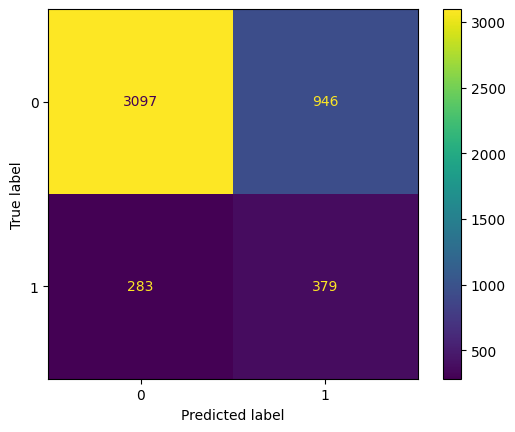

In [ ]:
# evaluation du modele RFE avec RF
evaluation_model(rfe_rf_model)

Nous constatons que le modele RFE avec RF n'a pas des bonnées performances , donc nous maintenons le Random forest sans le RFE

**Modele selectionné :** D'après l'évaluation des differents modeles sur les données de test, nous remarquons que le random forest donne plus de bonnes performances , 
donc nous allons le selectionner comme modele final

# Conclusion:
Nous avons utiliser les données de test pour selectionner notre modele, donc pour se rassurer de la qualité de notre modele à pour généraliser sur des nouvelles données, nous allons les test sur des données de validations

**************************************************
Performance sur les données de test

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      4042
           1       0.35      0.74      0.48       663

    accuracy                           0.77      4705
   macro avg       0.65      0.76      0.66      4705
weighted avg       0.86      0.77      0.80      4705



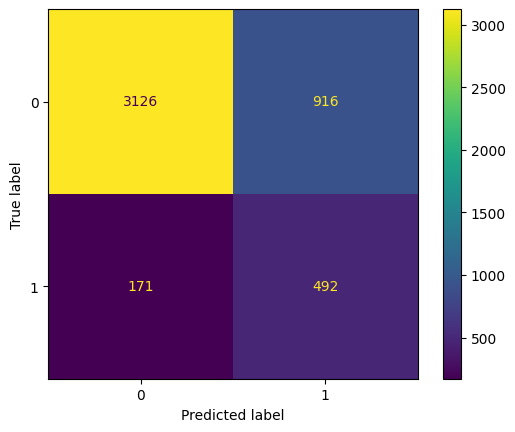

In [ ]:
# evalution du modele sur les données de validation
# entrainement du modele
rf_end = RandomForestClassifier(n_estimators=50,max_depth=5,random_state=seed)
model_rf_end = rf_end.fit(features_train,labels_train)
# evaluation des performance
print("*"*50)
yval_pred = model_rf_end.predict(x_val)
print("Performance sur les données de test\n")
print(classification_report(y_val,yval_pred))

# matrice de confusion
cm=confusion_matrix(y_val,yval_pred)
cm_disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf_end.classes_)
cm_disp.plot()
plt.show()

# Résumé:
Nous avons construit notre modele  sur la base des données de test et validation et il nous a données des bonnées performances.
Il est capable prédire qu'une personnes est succeptible d'utiliser un compte bancaire ou pas à **82% de certitude soit 18% de chance de se trompé**.

In [ ]:
# Enregistrement du modele
import joblib
joblib.dump(model_lr_grid,"model_FI_bank.joblib.bin")

['model_FI_bank.joblib.bin']

In [ ]:
import pickle as pkl
file = open("model_FI_end.pkl", "wb")
pkl.dump(model_rf_grid.best_estimator_, file)
file.close()

In [ ]:
features_train.tail(2)

,age_of_respondent,household_size,cellphone_access,education_level_No_formal_education,education_level_Primary_education,location_type,country_Kenya,job_type_Formally_employed_Private,education_level_Tertiary_education,gender_of_respondent,education_level_Vocational_Specialised_training,education_level_Secondary_education
24252,0.261905,0.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24253,0.464286,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
labels_train

13889    0
461      0
22762    0
10468    0
15860    0
        ..
1172     1
1083     1
423      1
18792    1
2127     1
Name: CHURN, Length: 24254, dtype: int64